**Pengantar**

Untuk membuat strategi pemasaran yang tepat, perusahaan perlu mengenal lebih baik konsumennya. Salah satu Teknik yang dapat digunakan yaitu melakukan segmentasi pelanggan. Segmentasi pelanggan merupakan metode mengelompokkan pelanggan-pelanggan yang ada berdasaran kesamaan karakter pelanggan tersebut. Untuk melakukan hal tersebut kita akan menggunakan teknik unsupervised machine learning. Salah satu Teknik yang dapat digunakan adalah menggunakan algoritma K-Prototypes.

**Apa itu K-Prototypes?**
Algoritma K-Prototypes merupakan gabungan dari K-Means dan juga K-Modes. K-Means digunakan untuk clustering pada data numerik, sedangkan K-Modes digunakan untuk clustering pada data kategorikal. Dataset yang akan digunakan pada project ini memiliki 2 tipe data: numerik dan kategorikal. Sehingga, kita akan menggunakan algoritma K-Prototypes.

**End to End Process Customer Segmentation with Python**

Alur proses end to end membuat model customer segmentation with Python dapat dilihat pada gambar dibawah.
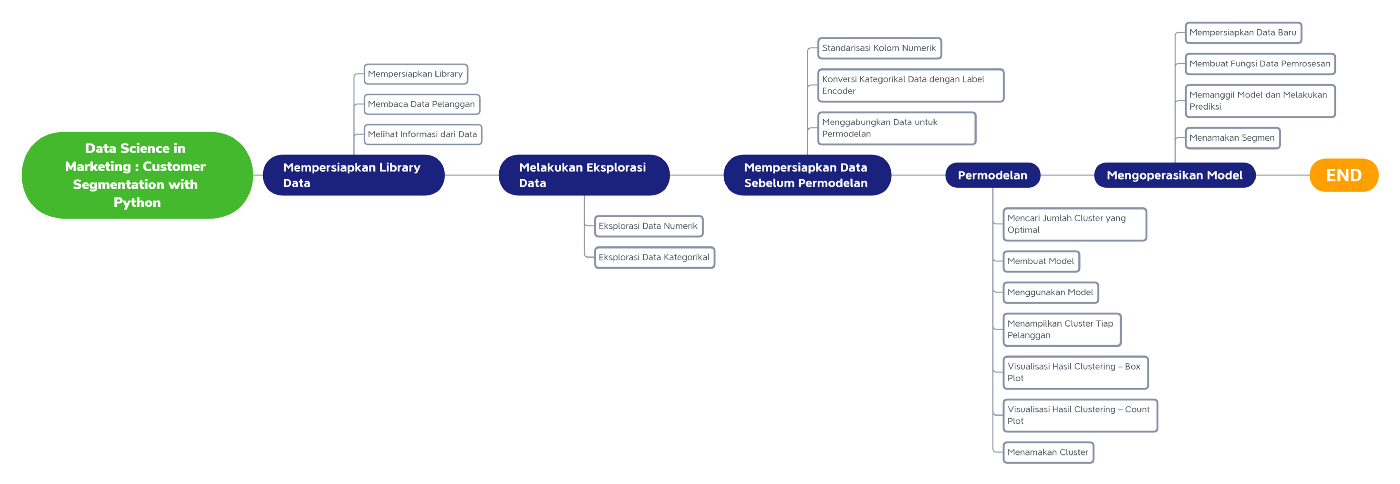
 
LETS START !


##Mempersiapkan Library dan Data

Pada tahap ini kita akan mengumpulkan data yang dibutuhkan. Data yang akan digunakan memiliki tujuh kolom dengan penjelasan sebagai berikut:

· Customer ID: Kode pelanggan dengan format campuran teks CUST- diikuti angka

· Nama Pelanggan: Nama dari pelanggan dengan format teks tentunya

· Jenis Kelamin: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita

· Umur: Umur dari pelanggan dalam format angka

· Profesi: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.

· Tipe Residen: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.

· Nilai Belanja Setahun: Merupakan total belanja yang sudah di keluarkan oleh pelanggan tersebut.

**Mempersiapkan Library**

Pada tahap ini kita akan melakukan import library untuk membantu menyelesaikan problem yang kita selesaikan. Library-library yang akan kita gunakan antara lain:

· Pandas, di gunakan untuk melakukan pemrosesan analisis data

· Matplotlib, di gunakan sebagai dasar untuk melakukan visualisasi data

· Seaborn, di gunakan di atas matplotlib untuk melakukan data visualisasi yang lebih menarik

· Scikit — Learn, digunakan untuk mempersiapkan data sebelum dilakukan permodelan

· kmodes, digunakan untuk melakukan permodelan menggunakan algoritma K-Modes dan K-Prototypes.

· Pickle, digunakan untuk melakukan penyimpanan dari model yang akan di buat.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import pickle
from pathlib import Path

**Membaca Data Pelanggan**

Langkah pertama, kita akan membaca data tersebut yang sebelumnya textfile menjadi pandas dataframe menggunakan fungsi read_csv yang ada di pandas dan kemudian menampilkan 5 data teratas.

In [11]:
#import dataset
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t")

#Menampilkan data
print(df.head())

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector              9497927  
1      Cluster              2722700  
2      Cluster              5286429  
3      Cluster              5204498  
4      Cluster             10615206  


**Melihat Informasi dari Data**

Selanjutnya kita akan melihat informasi data. Fungsi yang digunakan yaitu info() dari pandas. Dengan fungsi tersebut kita bisa mengetahui jumlah baris dan kolom, nama kolom, identifikasi null values, dan juga mengetahui tipe data.

In [12]:
#Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


#Melakukan Eksplorasi Data

**Eksplorasi Data Numerik**

Pertama, kita akan melihat distribusi dari data numerik. Disini kita akan menggunakan boxplot dan histogram. Kolom yang akan digunakan adalah ‘Umur’ dan ‘NilaiBelanjaSetahun’

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

<Figure size 432x288 with 0 Axes>

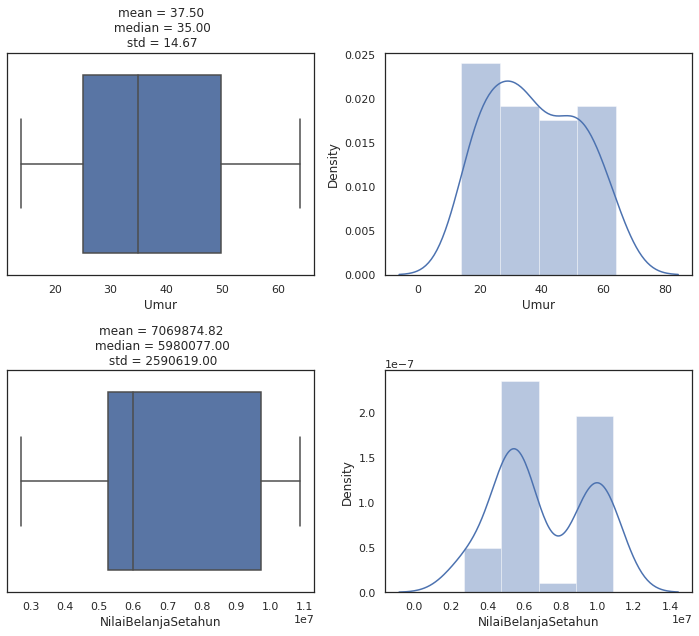

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
plt.clf()
  
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Umur','NilaiBelanjaSetahun'] 
observasi_num(kolom_numerik)

**Eksplorasi Data Kategorikal**

Selanjutnya kita akan melihat persebaran data kategorikal. Visualisasi yang akan kita gunakan yaitu countplot dari library seaborn. Kolom yang akan kita gunakan yaitu Jenis Kelamin, Profesi, dan Tipe Residen.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

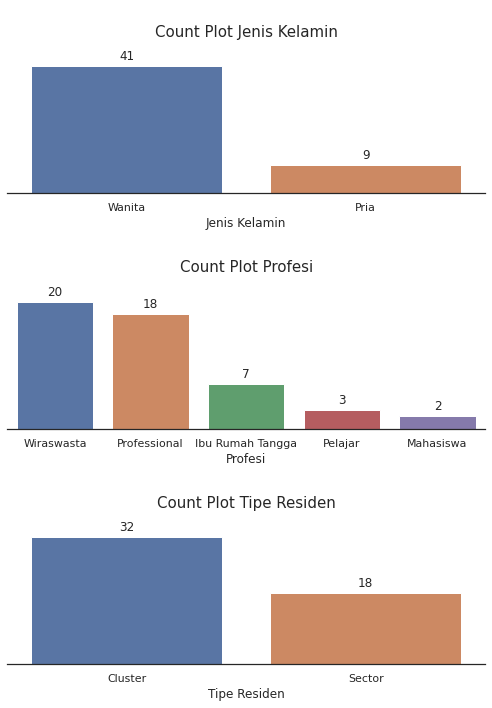

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
plt.clf()
  
# Menyiapkan kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  

# Membuat canvas
fig, axs = plt.subplots(3,1,figsize=(7,10)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorikal):  
    # Membuat Plot
    sns.countplot(df[kol], order = df[kol].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
      
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs)
    plt.tight_layout()

# Tampilkan plot
plt.show()

Dari hasil explorasi data tersebut, kita mendapatkan informasi:

· Rata-rata dari umur pelanggan adalah 37.5 tahun

· Rata-rata dari nilai belanja setahun pelanggan adalah 7,069,874.82

· Jenis kelamin pelanggan di dominasi oleh wanita sebanyak 41 orang (82%) dan laki-laki sebanyak 9 orang (18%)

· Profesi terbanyak adalah Wiraswasta (40%) diikuti dengan Professional (36%) dan lainnya sebanyak (24%)

· Dari seluruh pelanggan 64% dari mereka bertempat tinggal di cluster dan 36% nya tinggal di sektor

# Mempersiapkan Data Sebelum Permodelan

Setiap model machine learning memiliki karakteristik berbeda-beda. Untuk itu, kita harus mempersiapkan data yang dimiliki sebelum digunakan digunakan untuk permodelan. Sehingga, dapat sesuai dengan karakteristik yang dimiliki oleh model dan mendapatkan hasil yan optimal.

Pada project ini kita akan melakukan permodelan menggunakan Teknik unsupervised clustering. Algoritma yang digunakan adalah K-Prototypes. Salah satu factor utama dalam algoritma ini yaitu skala yang setara antar variable pada data. Kemudian, kita perlu melakukan encoding untuk mengubah data kategorikal menjadi numerik. Lalu, menggabungkan hasil pemrosesan data tersebut menjadi satu data frame.

**Standarisasi Kolom Numerik**

Standarisasi dilakukan dengan cara mengubah data-data numerik berada pada satu skala. Tujuannya agar variable yang memiliki skala besar tidak mendominasi (tiap variable dianggap sama penting/setara).

In [19]:
from sklearn.preprocessing import StandardScaler

kolom_numerik = ['Umur', 'NilaiBelanjaSetahun']

#Statistik sebelum Standarisasi
print('Statistik Sebelum Standarisasi\n')
print(df[kolom_numerik].describe().round(1))

#Standarisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

#Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index,
                      columns=df[kolom_numerik].columns)

#Menampilkan contoh isi data dan summary statistic
print('Contoh hasil standarisasi\n')
print(df_std.head())

print('Statistik hasil standarisasi\n')
print(df_std.describe().round(0))

Statistik Sebelum Standarisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standarisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standarisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   -0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


**Konversi Kategorikal Data dengan Label Encoder**

Kolom yang berjenis kategorikal perlu diubah menjadi angka. Caranya menggunakan salah satu fungsi dari sklearn yaitu LabelEncoder.

In [20]:
from sklearn.preprocessing import LabelEncoder
  
#Inisiasi nama kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
#Membuat salinan data frame  
df_encode = df[kolom_kategorikal].copy()  
  
  
#Melakukan labelEncoder untuk semua kolom kategorikal  
for col in kolom_kategorikal:  
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])
      
#Menampilkan data  
print(df_encode.head())

   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


**Menggabungkan Data untuk Permodelan**

Dua hasil Standarisasi dan Konversi Kategorikal sebelumnya digabungkan menjadi satu dataframe. Dataframe ini akan digunakan untuk permodelan.

In [22]:
# Menggabungkan data frame
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')  
print (df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


# Permodelan

Untuk melakukan segmentasi kita dapat menggunakan clustering. Clustering adalah proses pembagian objek-objek ke dalam beberapa kelompok (cluster) berdasarkan tingkat kemiripan anara satu objek dengan objek yang lain. Algoritma clustering yang akan digunakan adalah K-Prototypes.

**Mencari Jumlah Cluster yang Optimal**

Pada langkah awal, kita perlu menentukan akan membagi customer dalam berapa kelompok/cluster. Penentuan cluster merupakan parameter yang penting. Oleh karena itu, kita perlu mencari jumlah cluster paling optimal. Salah satu cara untuk mendapatkan nilai optimal tersebut adalah menggunakan ‘elbow plot’.

Elbow plot ini dapat di buat dengan cara memvisualisasikan total jarak seluruh data kita ke pusat cluster nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.

Untuk melakukan hal ini, kita perlu menjalankan algoritma kprototypes dengan berbagai jumlah cluster. Selanjutnya, kita akan menimpannya pada variable cost dan memvisualkannya dengan line dan point plot. Pada project ini kita akan menggunakan nilai cluster 2 s/d 9.

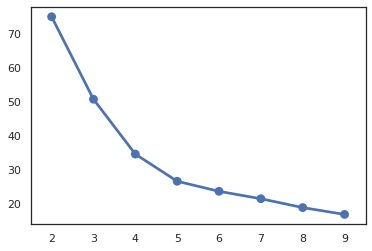

In [23]:
# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes(n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost[k]= kproto.cost_  
  
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

Berdasarkan grafik tersebut dapat dilihat bahwa 5 cluster merupakan nilai paling optimal (k=5).

**Membuat Model**

Selanjutnya kita akan membuat model Kprototypes dengan nilai k=5 dan random state 75. Kemudian hasilnya disimpan dalam bentuk pickle.

In [24]:
kproto = KPrototypes(n_clusters = 5, random_state = 75)
kproto = kproto.fit(df_model, categorical=[0,1,2])

#Save Model
pickle.dump(kproto, open('cluster.pkl', 'wb'))

**Menggunakan Model**

Model yang telah dibuat dapat digunakan untuk menentukan setiap pelanggan masuk ke dalam cluster yang mana.

In [26]:
#Menentukan segmen tiap pelanggan
clusters = kproto.predict(df_model, categorical=[0,1,2])
print('segmen pelanggan: {}\n'.format(clusters))

#Menggabungkan data awal dan segmen pelanggan
df_final = df.copy()
df_final['cluster'] = clusters
print(df_final.head())

segmen pelanggan: [1 0 2 2 3 4 1 2 4 4 2 2 1 1 3 4 4 2 3 0 3 2 4 3 3 2 3 4 2 2 0 1 0 3 4 3 4
 1 4 0 4 3 4 3 4 3 2 1 4 1]

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  cluster  
0       Sector              9497927        1  
1      Cluster              2722700        0  
2      Cluster              5286429        2  
3      Cluster              5204498        2  
4      Cluster             10615206        3  


**Menampilkan Cluster Tiap Pelanggan**

Pada tahap ini, kita menampilkan dan mengobservasi hasilnya untuk membantu dalam memberi nama tiap cluster berdasarkan karakteristinya.

In [27]:
#Menampilkan data pelanggan berdasarkan clusternya
for i in range(0,5):
  print('\nPelanggan cluster: {}\n'.format(i))
  print(df_final[df_final['cluster']==i])


Pelanggan cluster: 0

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur    Profesi Tipe Residen  \
1     CUST-002  Shirley Ratuwati        Wanita    14    Pelajar      Cluster   
19    CUST-020    Irene Novianto        Wanita    16    Pelajar       Sector   
30    CUST-031     Eviana Handry        Wanita    19  Mahasiswa      Cluster   
32    CUST-033   Cecilia Kusnadi        Wanita    19  Mahasiswa      Cluster   
39    CUST-040    Irene Darmawan        Wanita    14    Pelajar       Sector   

    NilaiBelanjaSetahun  cluster  
1               2722700        0  
19              2896845        0  
30              3042773        0  
32              3047926        0  
39              2861855        0  

Pelanggan cluster: 1

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0     CUST-001      Budi Anggara          Pria    58  Wiraswasta       Sector   
6     CUST-007     Cahyono, Agus          Pria    64  Wiraswasta       Sector   
12    CUST-013      

Pada tahap selanjutnya, kita akan menggunakan visualisasi untuk memudahkan penamaan tiap-tiap cluster.

**Visualisasi Hasil Clustering — Box Plot**

Visualisasi ini dilakukan pada data numerik.

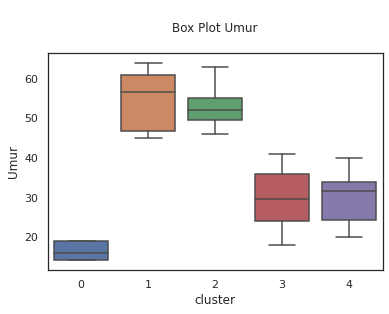

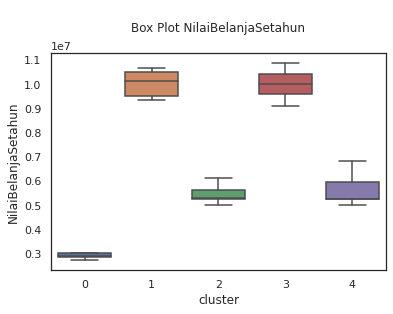

In [28]:
# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster', y = i, data = df_final)  
    plt.title ('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show()

**Visualisasi Hasil Clustering — Count Plot**

Visualisasi ini dilakukan pada data kategorikal.

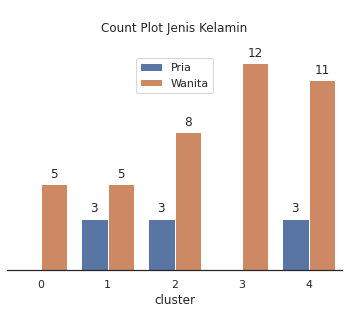

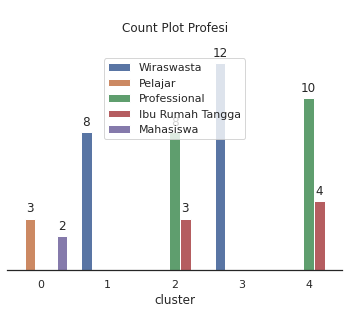

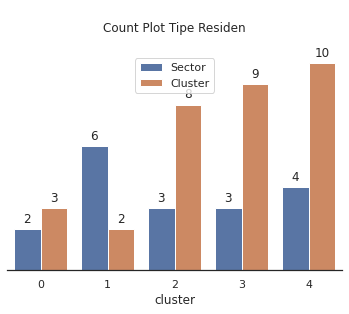

In [29]:
# Data Kategorikal  
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
for i in kolom_categorical:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend (loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()

**Menamakan Cluster**

Dari hasil observasi yang dilakukan kamu dapat memberikan nama segmen dari tiap tiap nomor kluster nya. Yaitu:

· Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18–41 tahun dengan rata-ratanya adalah 29 tahun.

· Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswata yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45–64 tahun dengan rata-ratanya adalah 55 tahun.

· Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.

· Cluster 3: Gold Young Member, isi cluster ini adalah para professional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20–40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahun nya mendekati 6 juta.

· Cluster 4: Gold Senior Member, isi cluster ini adalah para professional dan ibu rumah tangga yang berusia tua dengan rentang umur 46–63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahun nya mendekati 6 juta.

Pada dataframe, kita akan menambahkan satu buah kolom dengan nama ‘segmen’. Kolom tersebut akan diisi dengan nama segmen dari tiap-tiap pelanggan berdasarkan nilai clusternya.

In [30]:
# Mapping nama kolom  
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

print(df_final.info())
print(df_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB
None
  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    

# Mengoperasikan Model

**Mempersiapkan Data Baru**

Disini kita akan membuat contoh data baru untuk prediksi dengan model yang telah dibuat.

In [31]:
# Data Baru  
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]  
  
# Membuat Data Frame  
new_df = pd.DataFrame(data)  
  
# Melihat Data  
print(new_df)

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  
0              8230000  


**Membuat Fungsi Data Pemrosesan**

Ini sama dengan melakukan standarisasi (data numerk) dan encoding (data kategorikal) pada tahap preprocessing.

In [32]:
def data_preprocess(data):  
    # Konversi Kategorikal data  
    kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']  
      
    df_encode = data[kolom_kategorikal].copy()  
  
    ## Jenis Kelamin   
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })  
      
    ## Profesi  
    df_encode['Profesi'] = df_encode['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    })  
      
    ## Tipe Residen  
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    })  
      
    # Standardisasi Numerical Data  
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    df_std = data[kolom_numerik].copy()  
      
    ## Standardisasi Kolom Umur  
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7  
      
    ## Standardisasi Kolom Nilai Belanja Setahun  
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0  
      
    # Menggabungkan Kategorikal dan numerikal data  
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
      
    return df_model  
  
# Menjalankan fungsi  
new_df_model = data_preprocess(new_df)  
  
print(new_df_model)

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


**Memanggil Model dan Melakukan Prediksi**

Setelah data baru siap, lalu kita akan memanggil model yang telah disimpan sebelumnya dan dilanjutkan melakukan prediksi.

Disini kita akan membuat fungsi bernama modelling yang digunakan untuk memproses data baru dengan model yang telah dibuat.

In [33]:
def modelling (data):  
      
    # Memanggil Model  
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Melakukan Prediksi  
    clusters = kpoto.predict(data,categorical=[0,1,2])  
      
    return clusters  
  
# Menjalankan Fungsi  
clusters = modelling(new_df_model)  
  
print(clusters)

[1]


**Menamakan Segmen**

Disini kita akan membuat fungsi bernama menamaka_segmen dengan data asli dan clusters sebagai inputnya.

In [34]:
def menamakan_segmen (data_asli, clusters):  
      
    # Menggabungkan cluster dan data asli  
    final_df = data_asli.copy()  
    final_df['cluster'] = clusters
      
    # Menamakan segmen  
    final_df['segmen'] = final_df['cluster'].map({  
        0: 'Diamond Young Member',  
        1: 'Diamond Senior Member',  
        2: 'Silver Students',  
        3: 'Gold Young Member',  
        4: 'Gold Senior Member'  
    })  
      
    return final_df
  
# Menjalankan Fungsi  
new_final_df = menamakan_segmen (new_df,clusters)  
  
print(new_final_df)

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  cluster                 segmen  
0              8230000        1  Diamond Senior Member  


Data yang baru masuk menunjukkan bahwa customer tersebut termasuk kedalam cluster 1 segmen Diamond Senior Member.